# PRINCIPAL COMPONENT ANALYSIS
# Processing of Landscape metrics (LSM) and Gray-level Co-occurence Matrix (GLCM) features

### 0. Introduction

This code was developed by Lorraine Oliveira during her MSc research 'EXPLORING THE DIVERSITY OF DEPRIVED AREAS: APPLICATIONS OF UNSUPERVISED MACHINE LEARNING AND OPEN GEODATA'

PCA is used in the selection of the optimal moving window for LSM and GLCM hand-crafted features used in the study.

**LSM**

Input data: 'PCA_lsm_input.csv'

Four moving windows are tested: 3x3 (40m+n),5x5 (60m+n), 7x7 (80m+n) and 9x9 (100m+n) kernels, where *'n'* is the cell resolution size used in this research (20m).

Five LSM features were generated from fragstats software and feature values were extracted with ESRI software.

Summary of LSM acronyms:
* FRAC_MN = Fractal dimension index
* SHAPE_MN = Shape index
* AI = Aggregation index
* AREA_MN = Area-weighted mean patch area
* PD_MN = Mean patch density

**GLCM**

Input data: 'PCA_glcm_input.csv'

Six moving windows are tested: 3x3, 5x5, 7x7, 9x9, 11x11 and 13x13 kernels.

Seven GLCM features were generated from r package 'glcm' and feature values were extracted with ESRI software.
* b1 = mean
* b2 = variance
* b3 = homogeneity
* b4 = dissimilarity
* b5 = contrast
* b6 = entropy
* b7 = second moment

### 1. Import packages

First, install the necessary Python libraries and set the correct directory

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [4]:
# Set the working path
BASE_PATH = r"C:\Users\Lorra\Documents\ITC\THESIS\code_R\LSM"
os.chdir(BASE_PATH)

### 2. Import the data 

Read the data (georeferenced tabular format)

In [5]:
data = pd.read_csv('C:/Users/lorra/Documents/ITC/THESIS/code_R/LSM/lsm_kernel2.csv')
data.head(5)

,Unnamed: 0,shape_mn_4,ai_40,area_mn_40,frac_mn_40,pd_40,shape_mn_6,ai_60,area_mn_60,frac_mn_60,...,ai_100,area_mn_10,frac_mn_10,pd_100,PC1,PC2,PC3,PC4,PC5,PC6
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,-15.437541,1.411011,-0.0059,-0.042425,-0.002653,0.000938
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,-15.437541,1.411011,-0.0059,-0.042425,-0.002653,0.000938
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,-15.437541,1.411011,-0.0059,-0.042425,-0.002653,0.000938
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,-15.437541,1.411011,-0.0059,-0.042425,-0.002653,0.000938
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,-15.437541,1.411011,-0.0059,-0.042425,-0.002653,0.000938


### 3. Check the data

In [6]:
# Describe data structure
data.describe()

,Unnamed: 0,shape_mn_4,ai_40,area_mn_40,frac_mn_40,pd_40,shape_mn_6,ai_60,area_mn_60,frac_mn_60,...,ai_100,area_mn_10,frac_mn_10,pd_100,PC1,PC2,PC3,PC4,PC5,PC6
count,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000,...,149947.000000,149947.000000,149947.000000,149947.000000,1.499470e+05,1.499470e+05,1.499470e+05,1.499470e+05,1.499470e+05,1.499470e+05
mean,74974.000000,0.913881,89.627075,0.306630,0.912754,253.419374,0.913881,89.627075,0.306630,0.912754,...,91.750909,0.840611,0.943019,95.190967,5.046447e-15,-1.122107e-16,2.691540e-17,-5.051375e-17,3.047884e-16,5.554232e-16
std,43286.114744,0.291406,29.833880,0.114141,0.289143,81.834228,0.291406,29.833880,0.114141,0.289143,...,25.433427,0.305361,0.249498,28.627080,4.265188e+00,1.264822e+00,3.495549e-01,2.822498e-01,6.463800e-02,4.865380e-02
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.543754e+01,-7.872235e+00,-4.229402e+00,-6.969194e-01,-1.741044e+00,-1.545080e+00
25%,37487.500000,1.000000,100.000000,0.360000,1.000000,277.778000,1.000000,100.000000,0.360000,1.000000,...,100.000000,0.840000,1.000000,100.000000,1.304927e+00,1.229608e-01,2.874985e-02,-5.905645e-03,6.337726e-03,-3.598726e-04
50%,74974.000000,1.000000,100.000000,0.360000,1.000000,277.778000,1.000000,100.000000,0.360000,1.000000,...,100.000000,1.000000,1.000000,100.000000,1.305222e+00,1.229608e-01,2.874985e-02,-5.905645e-03,6.337726e-03,-3.598726e-04
75%,112460.500000,1.000000,100.000000,0.360000,1.000000,277.778000,1.000000,100.000000,0.360000,1.000000,...,100.000000,1.000000,1.002430,100.000000,1.305222e+00,1.230953e-01,2.874985e-02,-5.905645e-03,6.337726e-03,-3.271123e-04
max,149947.000000,1.600000,100.000000,0.360000,1.126020,833.333000,1.600000,100.000000,0.360000,1.126020,...,100.000000,1.000000,1.172010,400.000000,2.128128e+00,9.107407e+00,2.724816e-01,5.073664e+00,1.679282e-01,7.166761e-01


In [7]:
data.shape

(149947, 27)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'shape_mn_4'),
  Text(1, 0, 'ai_40'),
  Text(2, 0, 'area_mn_40'),
  Text(3, 0, 'frac_mn_40'),
  Text(4, 0, 'pd_40'),
  Text(5, 0, 'shape_mn_6'),
  Text(6, 0, 'ai_60'),
  Text(7, 0, 'area_mn_60'),
  Text(8, 0, 'frac_mn_60'),
  Text(9, 0, 'pd_60'),
  Text(10, 0, 'shape_mn_8'),
  Text(11, 0, 'ai_80'),
  Text(12, 0, 'area_mn_80'),
  Text(13, 0, 'frac_mn_80'),
  Text(14, 0, 'pd_80'),
  Text(15, 0, 'shape_mn_1'),
  Text(16, 0, 'ai_100'),
  Text(17, 0, 'area_mn_10'),
  Text(18, 0, 'frac_mn_10'),
  Text(19, 0, 'pd_100')])

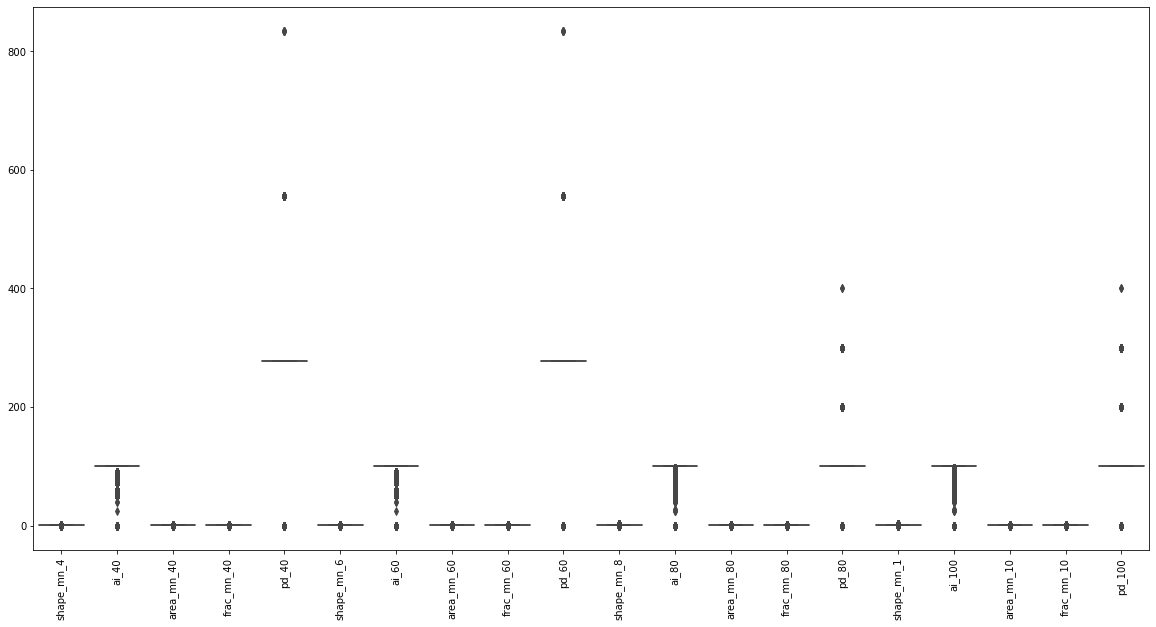

In [9]:
# Visualize the features
import seaborn as sns # data visualization library  
plt.figure(figsize=(20,10))
sns.boxplot(data=data.iloc[:,1:21])
plt.xticks(rotation=90)

In [22]:
# Remove id column
data.iloc[:,1:21].head(5)

,shape_mn_4,ai_40,area_mn_40,frac_mn_40,pd_40,shape_mn_6,ai_60,area_mn_60,frac_mn_60,pd_60,shape_mn_8,ai_80,area_mn_80,frac_mn_80,pd_80,shape_mn_1,ai_100,area_mn_10,frac_mn_10,pd_100
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0


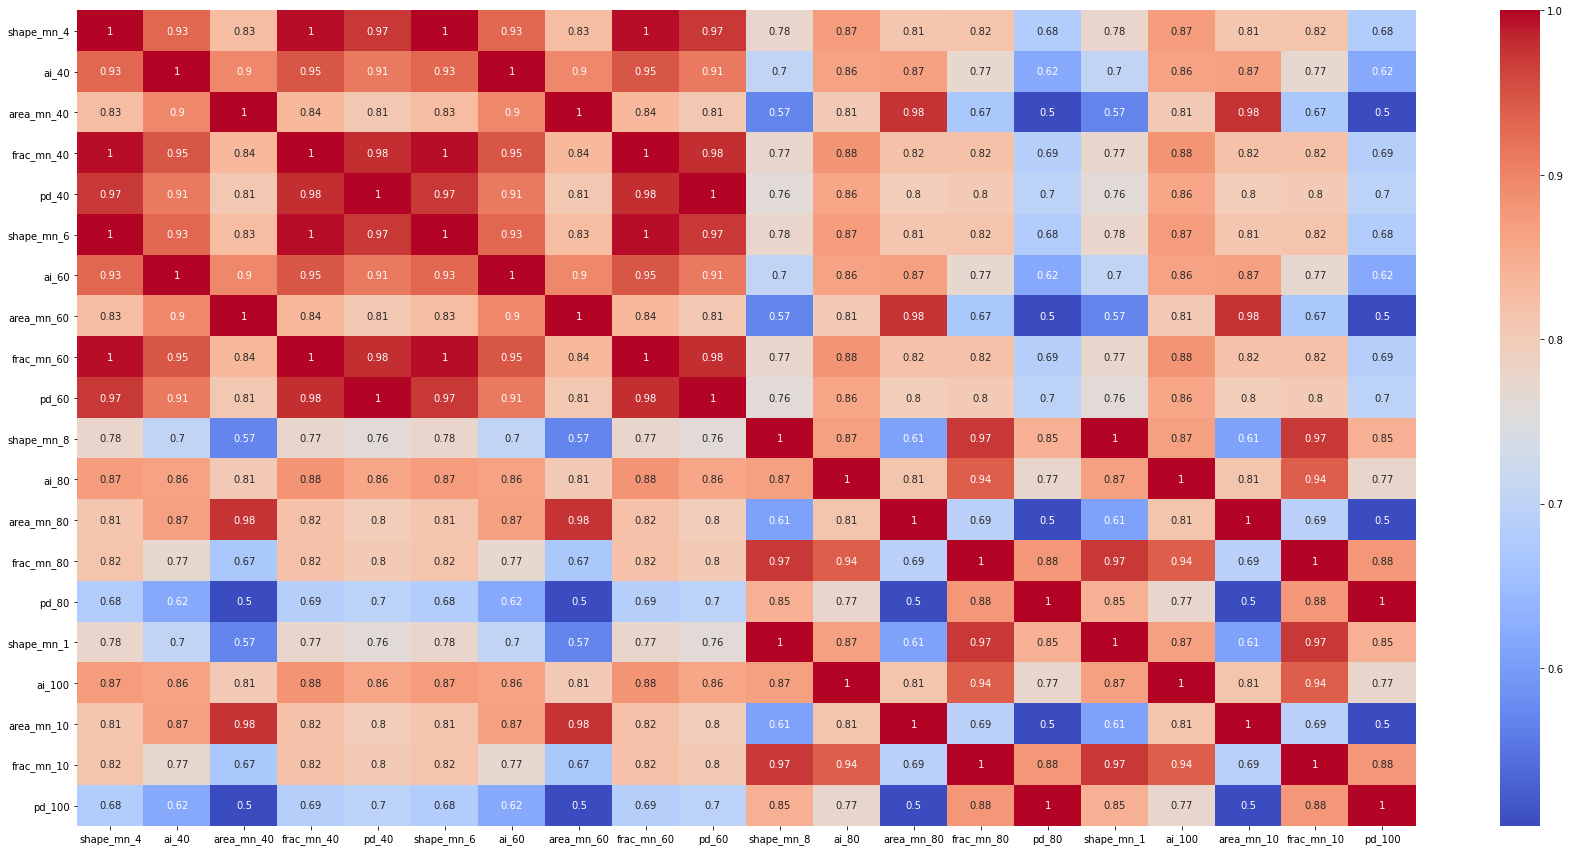

In [13]:
# Calculate Pearson Correlation Matrix
plt.figure(figsize=(30,15))
cor = df.iloc[:,1:21].corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()
fig = plt.figure()
fig.savefig('correlation_plot.jpg', bbox_inches='tight', dpi=150)

### 4. Run PCA

There are different packages to ran PCA in Python language. 

Here we use FactorAnalyzer and Scikit-learn packages. 
The results of the packages are complementary and derive different assessment metrics used in this research. 

An automatized workflow is necessary to compile these packages together. 

In [10]:
# Normalize the features
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize

**This part of the code runs all necessary assessment metrics, combining both packages, but it is not easy to visualize the results.**

In [11]:
X = data.iloc[:, 1:21]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=4, rotation="varimax", method="principal", 
                    is_corr_matrix=False)
fa.fit(X_scaled)

print("Eigenvalues:")
print(fa.get_eigenvalues()[0])
print()
print("Communalities:")
print(fa.get_communalities())
print()
print("Specific Variances:")
print(fa.get_uniquenesses())
print()
print("Factor Loadings:")
print(fa.loadings_)

Eigenvalues:
[ 1.65421346e+01  2.01058652e+00  6.95435945e-01  3.52792634e-01
  1.60651925e-01  1.34590728e-01  5.39597067e-02  3.13598250e-02
  1.39408927e-02  4.54717369e-03  1.74746607e-16  9.93426949e-17
  6.71676002e-17  1.22419066e-17  4.95907924e-18 -6.73777084e-18
 -1.44670750e-17 -4.72372782e-17 -4.46472044e-16 -2.62091061e-15]

Communalities:
[0.98783316 0.94438988 0.99059744 0.99628604 0.97463371 0.98783316
 0.94438988 0.99059744 0.99628604 0.97463371 0.97924388 0.95130008
 0.98175639 0.99482445 0.99960984 0.97924388 0.95130008 0.98175639
 0.99482445 0.99960984]

Specific Variances:
[0.01216684 0.05561012 0.00940256 0.00371396 0.02536629 0.01216684
 0.05561012 0.00940256 0.00371396 0.02536629 0.02075612 0.04869992
 0.01824361 0.00517555 0.00039016 0.02075612 0.04869992 0.01824361
 0.00517555 0.00039016]

Factor Loadings:
[[ 0.44518135  0.47153671  0.75245212  0.03340155]
 [ 0.36711927  0.62894299  0.64167137  0.04797804]
 [ 0.24678095  0.8757949   0.39691643  0.07167463]
 [ 

In [44]:
# Preparation for factor_analyzer package
names = data.columns
df = pd.DataFrame(data,columns=names)
df.iloc[:,1:21]= StandardScaler().fit_transform(df.iloc[:,1:21])
print(df.iloc[:,1:21])

        shape_mn_4     ai_40  area_mn_40  frac_mn_40     pd_40  shape_mn_6  \
0        -3.136125 -3.004215   -2.686414   -3.156772 -3.096751   -3.136125   
1        -3.136125 -3.004215   -2.686414   -3.156772 -3.096751   -3.136125   
2        -3.136125 -3.004215   -2.686414   -3.156772 -3.096751   -3.136125   
3        -3.136125 -3.004215   -2.686414   -3.156772 -3.096751   -3.136125   
4        -3.136125 -3.004215   -2.686414   -3.156772 -3.096751   -3.136125   
...            ...       ...         ...         ...       ...         ...   
149942    0.295530  0.347691   -1.635083    0.442088  0.297659    0.295530   
149943    1.153443 -0.490286   -1.284639    0.510947  0.297659    1.153443   
149944    0.981860 -0.322690   -0.934195    0.569188  0.297659    0.981860   
149945    0.295530  0.347691   -1.635083    0.442088  0.297659    0.295530   
149946    0.295530  0.347691   -1.985527    0.362680  0.297659    0.295530   

           ai_60  area_mn_60  frac_mn_60     pd_60  shape_mn_8 

In [45]:
# Import the library
from factor_analyzer.factor_analyzer import calculate_kmo

In [46]:
# Run KMO test
kmo_all, kmo_model = calculate_kmo(df.iloc[:,1:21][df.iloc[:,1:21].columns]);
print('KMO score: {}'.format(kmo_model));

KMO score: 0.8026295335897131


C:\Users\lorra\anaconda3\envs\GDAL\lib\site-packages\factor_analyzer\utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [62]:
# Estimate eigenvalues
from factor_analyzer import FactorAnalyzer

fa=FactorAnalyzer(rotation=None)
fa.fit(df.iloc[:,1:11])
ev,v = fa.get_eigenvalues()

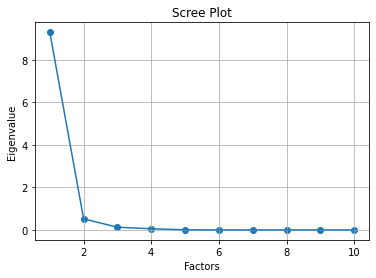

In [63]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.iloc[:,1:11].shape[1]+1),ev)
plt.plot(range(1,df.iloc[:,1:11].shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [64]:
# Calculate and visualize variance of each factor 
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance', 'Proportional Var', 'Cumulative Var']))

                         0         1         2
Variance          9.281805  0.512942  0.119554
Proportional Var  0.928181  0.051294  0.011955
Cumulative Var    0.928181  0.979475  0.991430


In [65]:
# Calculate and visualize communalities table for each feature
print(pd.DataFrame(fa.get_communalities(),index=data.iloc[:,1:11].columns,columns=['Communalities']))

            Communalities
shape_mn_4       0.987533
ai_40            0.996926
area_mn_40       0.997484
frac_mn_40       0.996742
pd_40            0.978465
shape_mn_6       0.987533
ai_60            0.996926
area_mn_60       0.997484
frac_mn_60       0.996742
pd_60            0.978465


**The next steps are done for each kernel at a time with all LSM features.**

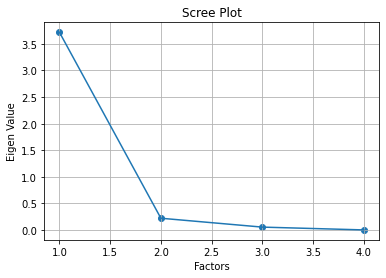

In [31]:
# Visualize each kernel at a time with all LSM features -> this step was repeateadly four times for each kernel

X = data.iloc[:, 1:5]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_scaled = sc.fit_transform(X)

#FA - factor analysis
from factor_analyzer import FactorAnalyzer
#x = data.iloc[:, 1:21]
fa = FactorAnalyzer()
fa.fit(df_scaled)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,df_scaled.shape[1]+1),ev)
plt.plot(range(1,df_scaled.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()
#check eigenvalues
#ev, v = fa.get_eigenvalues()
#ev
#plt.plot(range(1,x.shape[1]+1),ev)

In [36]:
# Calculate factor loadings for each kernel at a time
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(3, rotation="varimax")
fa.fit(data.iloc[:,1:6])
print(pd.DataFrame(fa.loadings_,index=data.iloc[:,1:6].columns))

                   0         1         2
shape_mn_4  0.801187  0.585749  0.102360
ai_40       0.558002  0.826918  0.014412
area_mn_40  0.469141  0.766874 -0.000710
frac_mn_40  0.788546  0.609057  0.061086
pd_40       0.828444  0.545945 -0.103304


In [37]:
# Calculate variance of each factor component
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance', 'Proportional Var', 'Cumulative Var']))

                         0         1         2
Variance          2.481486  2.283997  0.025089
Proportional Var  0.496297  0.456799  0.005018
Cumulative Var    0.496297  0.953097  0.958114


In [38]:
# Calculate communalities table for each kernel
print(pd.DataFrame(fa.get_communalities(),index=data.iloc[:,1:6].columns,columns=['Communalities']))

            Communalities
shape_mn_4       0.995480
ai_40            0.995368
area_mn_40       0.808190
frac_mn_40       0.996487
pd_40            0.995047


**A new experiment is done with the scikit package to estimate how the features are being loaded to each Principal component and visualize the resulting data frames in a more intuitive tabular format**

In [68]:
# Determine the transformed features fitting the data structure
from sklearn.decomposition import PCA
n=10
pca = PCA(n)
trans_pca = pca.fit_transform(data.iloc[:,1:21])

In [70]:
# Calculate PC loadings
pca_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
pca_loading_matrix = pd.DataFrame(pca_loadings,columns=['PC{}'.format(i) for i in range(1, n+1)],
                                 index=data.iloc[:,1:21].columns)
pca_loading_matrix['Highest_loading'] = pca_loading_matrix.idxmax(axis=1)
pca_loading_matrix = pca_loading_matrix.sort_values('Highest_loading')
pca_loading_matrix

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Highest_loading
pd_100,-0.786086,0.518947,-0.049715,0.331523,-0.001314,-0.005206,-0.008995,-0.014389,-0.008553,-0.000492,PC2
shape_mn_1,-0.864734,0.436685,-0.058384,-0.193346,0.091210,-0.103755,0.007342,0.006488,-0.039532,-0.003620,PC2
pd_80,-0.786086,0.518947,-0.049715,0.331523,-0.001314,-0.005206,-0.008995,-0.014389,-0.008553,-0.000492,PC2
frac_mn_80,-0.917917,0.356476,-0.125230,-0.097475,-0.012187,-0.001905,0.001799,0.026430,0.065580,0.004572,PC2
shape_mn_8,-0.864734,0.436685,-0.058384,-0.193346,0.091210,-0.103755,0.007342,0.006488,-0.039532,-0.003620,PC2
frac_mn_10,-0.917917,0.356476,-0.125230,-0.097475,-0.012187,-0.001905,0.001799,0.026430,0.065580,0.004572,PC2
frac_mn_60,-0.965077,-0.110009,0.229576,-0.010546,0.007580,0.009137,-0.043717,-0.010618,0.011349,-0.037687,PC3
shape_mn_4,-0.959298,-0.103163,0.237359,-0.024590,0.042444,0.012399,-0.095555,-0.018273,-0.000951,0.027314,PC3
ai_60,-0.939946,-0.232811,0.080472,0.014892,-0.174618,-0.151659,0.042685,-0.016309,-0.000195,0.005543,PC3
shape_mn_6,-0.959298,-0.103163,0.237359,-0.024590,0.042444,0.012399,-0.095555,-0.018273,-0.000951,0.027314,PC3


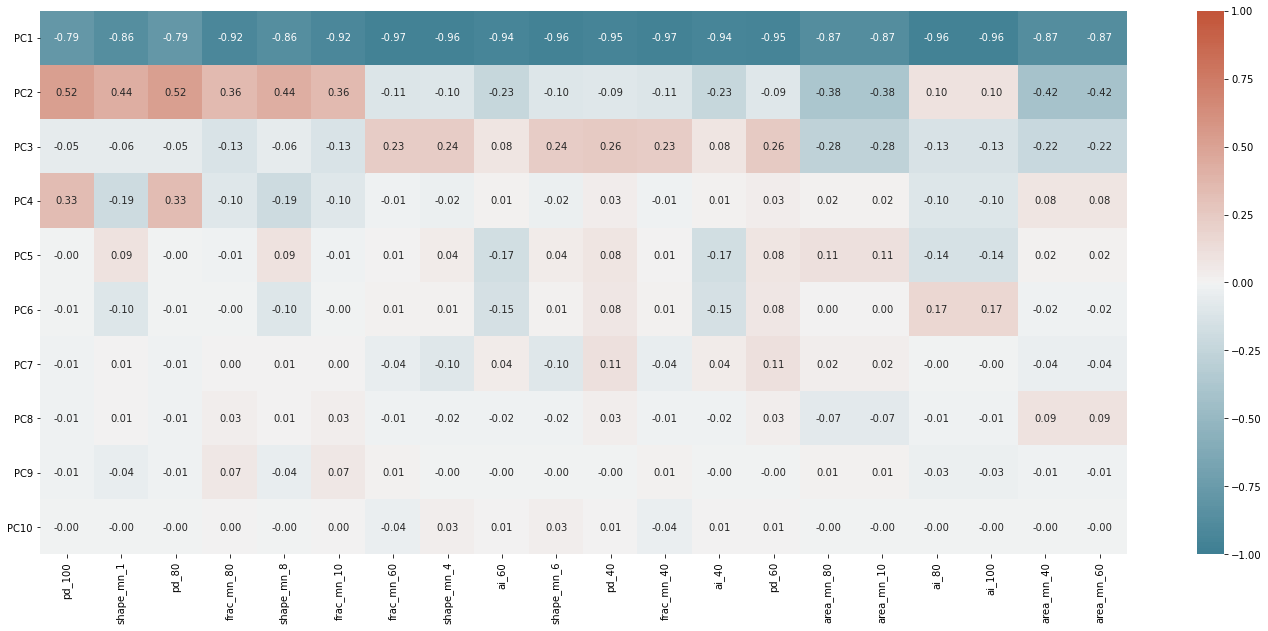

In [71]:
# Visualize the highest loadings in a heatmap format
import seaborn as sns
plt.figure(figsize=(25,10))

ax = sns.heatmap(pca_loading_matrix.drop('Highest_loading', 
                 axis=1).T, 
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(220, 20, n=200),
                 square=True, annot=True, fmt='.2f')

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0);

In [72]:
# Convert the tranformed PC's into a dataframe
component_names = [f"PC{i+1}" for i in range(trans_pca.shape[1])]
trans_pca = pd.DataFrame(trans_pca, columns=component_names)

trans_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,14.3619,-1.664548,0.457976,0.147344,0.044476,-0.028156,-0.001349,-0.01871,-0.041127,-0.001583
1,14.3619,-1.664548,0.457976,0.147344,0.044476,-0.028156,-0.001349,-0.01871,-0.041127,-0.001583
2,14.3619,-1.664548,0.457976,0.147344,0.044476,-0.028156,-0.001349,-0.01871,-0.041127,-0.001583
3,14.3619,-1.664548,0.457976,0.147344,0.044476,-0.028156,-0.001349,-0.01871,-0.041127,-0.001583
4,14.3619,-1.664548,0.457976,0.147344,0.044476,-0.028156,-0.001349,-0.01871,-0.041127,-0.001583


In [34]:
# Transpose the loadings matrix for better visualization (here columns are the PC's and rows are the features)
loadings = pd.DataFrame(
    pca.components_.T,  
    columns=component_names,  
    index=data.iloc[:,1:21].columns,  
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
shape_mn_4,-0.235861,-0.072755,0.284627,-0.041400,0.105895,0.033798,-0.411357,-0.103185,-0.008058,0.405052
ai_40,-0.231103,-0.164188,0.096498,0.025072,-0.435657,-0.413388,0.183754,-0.092095,-0.001655,0.082202
area_mn_40,-0.214125,-0.295902,-0.267026,0.135897,0.039644,-0.041092,-0.157990,0.486030,-0.109036,-0.022048
frac_mn_40,-0.237282,-0.077583,0.275294,-0.017755,0.018911,0.024906,-0.188198,-0.059961,0.096119,-0.558879
pd_40,-0.233247,-0.062563,0.307393,0.055688,0.203423,0.207212,0.471936,0.167282,-0.016796,0.093722
shape_mn_6,-0.235861,-0.072755,0.284627,-0.041400,0.105895,0.033798,-0.411357,-0.103185,-0.008058,0.405052
ai_60,-0.231103,-0.164188,0.096498,0.025072,-0.435657,-0.413388,0.183754,-0.092095,-0.001655,0.082202
area_mn_60,-0.214125,-0.295902,-0.267026,0.135897,0.039644,-0.041092,-0.157990,0.486030,-0.109036,-0.022048
frac_mn_60,-0.237282,-0.077583,0.275294,-0.017755,0.018911,0.024906,-0.188198,-0.059961,0.096119,-0.558879
pd_60,-0.233247,-0.062563,0.307393,0.055688,0.203423,0.207212,0.471936,0.167282,-0.016796,0.093722
